# CIFAR-10数据集分类实验 

## (1)使用torchvision加载并预处理CIFAR-10数据集

In [87]:
import torch
import torchvision as tv
import torchvision.transforms as transforms 
from torchvision.transforms import ToPILImage

pil_image = ToPILImage()

### 定义对数据的预处理 

In [88]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])

### 训练集 

In [89]:
trainset = tv.datasets.CIFAR10(root = 'E:\Data\dataSet\cifar-10-python',
                              train = True,
                              download = True,
                              transform = transform)

train_loader = torch.utils.data.DataLoader(trainset,
                                          batch_size = 4,
                                          shuffle = True,
                                          num_workers = 0)

Files already downloaded and verified


### 测试集 

In [90]:
testset = tv.datasets.CIFAR10(root='E:\Data\dataSet\cifar-10-python',
                             train = False, 
                             download = True, 
                             transform = transform)

testloader = torch.utils.data.DataLoader(testset,
                                        batch_size = 4,
                                        shuffle = False,
                                        num_workers = 0)

Files already downloaded and verified


In [91]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

####  一些说明测试

In [92]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: E:\Data\dataSet\cifar-10-python
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )

In [93]:
testset

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: E:\Data\dataSet\cifar-10-python
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )

frog


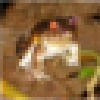

In [31]:
(data, label) = trainset[0]
print(classes[label])
pil_image((data+1)/2).resize((100, 100))

In [32]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
print('实际的标签为', ''.join('%08s' % classes[labels[j]] for j in range(4)))
pil_image(tv.utils.make_grid((images+1)/2, nrow=2, padding=1)).resize((500,500)).show()

实际的标签为     ship     car     cat   plane


In [33]:
tv.utils.make_grid((images+1)/2).size()

torch.Size([3, 36, 138])

In [34]:
'-'.join(['a', 'b', 'c'])

'a-b-c'

### 定义网络

In [35]:
import torch.nn as nn
import torch.nn.functional as F

In [36]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [37]:
net = Net()

In [53]:
net

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [82]:
list(net.parameters())

[Parameter containing:
 tensor([[[[-0.0283,  0.0698, -0.0194,  0.1097, -0.0779],
           [ 0.0788, -0.0198,  0.0678, -0.0083,  0.0326],
           [-0.0045, -0.0944,  0.0585,  0.0432,  0.0062],
           [-0.0966,  0.0774, -0.0157,  0.0500, -0.0951],
           [-0.1026, -0.0129, -0.0190,  0.0968, -0.0982]],
 
          [[ 0.1065, -0.1020,  0.0146, -0.0051, -0.0652],
           [ 0.0642,  0.0488,  0.0691,  0.0492, -0.0315],
           [ 0.0689, -0.0073, -0.0567,  0.0766, -0.0953],
           [-0.0107, -0.0729, -0.0037, -0.0300, -0.0119],
           [-0.1129,  0.0370,  0.0335,  0.0818, -0.0279]],
 
          [[-0.0439, -0.0852, -0.0632,  0.0062,  0.1039],
           [ 0.1113,  0.0165,  0.0922, -0.0963, -0.0394],
           [-0.0086, -0.0909, -0.1090, -0.0715, -0.0114],
           [ 0.1019, -0.0076,  0.0160, -0.0882,  0.0285],
           [-0.0952, -0.0964, -0.0240, -0.1004,  0.0037]]],
 
 
         [[[-0.0608, -0.0543, -0.0915, -0.0462,  0.0697],
           [ 0.0638, -0.0176, -0.0165

In [84]:
net.named_parameters

<bound method Module.named_parameters of Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)>

In [81]:
for name, paras in net.named_parameters():
    print(name, paras.size())

conv1.weight torch.Size([6, 3, 5, 5])
conv1.bias torch.Size([6])
conv2.weight torch.Size([16, 6, 5, 5])
conv2.bias torch.Size([16])
fc1.weight torch.Size([120, 400])
fc1.bias torch.Size([120])
fc2.weight torch.Size([84, 120])
fc2.bias torch.Size([84])
fc3.weight torch.Size([10, 84])
fc3.bias torch.Size([10])


### 定义损失函数和优化器

In [115]:
from torch import optim

In [116]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(params=net.parameters(), lr=0.001, momentum=0.9)

### 训练网络 

In [118]:
from torch.autograd import Variable
import time

In [119]:
Variable(inputs, requires_grad=True).type()

'torch.FloatTensor'

In [128]:
from torch.autograd import Variable
import time
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

for epoch in range(2):
    running_loss = 0
    start_time = time.time()
    # 1-->输入数据
    for i, data in enumerate(train_loader):  # 以一个batch为单位循环
        images, labels = data
        images, labels = Variable(images), Variable(labels)
        if torch.cuda.is_available():
            net.cuda()
            images = images.cuda()
            labels = labels.cuda()
        optimizer.zero_grad()  # 梯度清零
        # 2-->前向传播＋反向传播
        outputs = net(images)
        loss = criterion(outputs, labels)
        loss.backward()

        # 3-->更新参数
        optimizer.step()

        # 打印log信息
        running_loss += loss.data
        if i % 2000 == 1999:  # 每2000个batch打印一次训练信息
            print('[%d %5d] loss: %.3f  time: %.3fs' % (epoch+1, i+1, running_loss/2000, time.time()-start_time))
            running_loss = 0
            start_time = time.time()
print('Finish Training')

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!